# Data Visualization with Seaborn-countplot

[Seaborn: countplot](#Seaborn:-countplot)

[Intro Visuals](#Intro-Visuals)

# [Seaborn: countplot](https://github.com/kimfetti/Videos/blob/master/Seaborn/21_countplot.ipynb)
- [YouTube-displot | Kimberly Fessel](https://www.youtube.com/watch?v=8U5h3EJuu8M)
```python
seaborn.countplot(x=None, y=None, hue=None, data=None, orient=None)
```

In [1]:
import seaborn as sns

In [3]:
diamonds = sns.load_dataset('diamonds')

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds = diamonds[diamonds.clarity.isin(['SI1', 'VS2'])]

In [7]:
diamonds.shape

(25323, 10)

## Basics

In [16]:
sns.set_style('darkgrid')

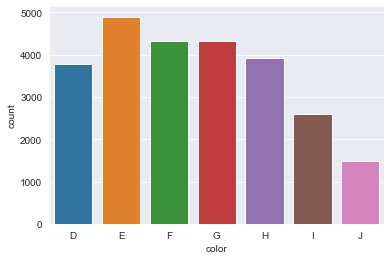

In [17]:
sns.countplot(x='color', data=diamonds);

In [23]:
diamonds.color.value_counts(sort=False)

D    3780
E    4896
F    4332
G    4323
H    3918
I    2593
J    1481
Name: color, dtype: int64

### Horizontal Countplot

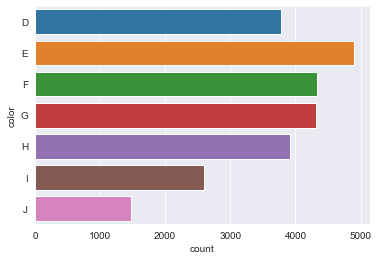

In [19]:
sns.countplot(y='color', data=diamonds);

## Options

### ```order```

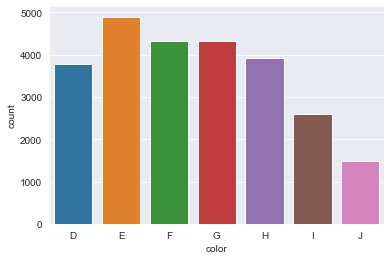

In [25]:
sns.countplot(x='color', data=diamonds);

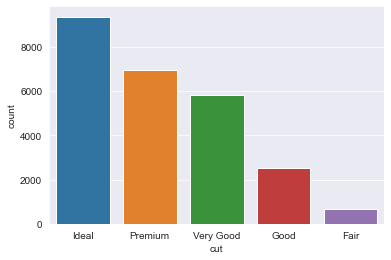

In [26]:
sns.countplot(x='cut', data=diamonds);

In [29]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [30]:
diamonds.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [31]:
diamonds.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

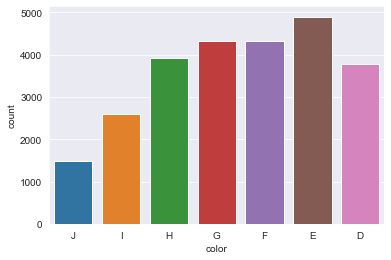

In [32]:
color_order=['J', 'I', 'H', 'G', 'F', 'E', 'D']

sns.countplot(x='color', data=diamonds, order=color_order);

### Order Ascending or Descending

In [35]:
diamonds.color.value_counts()

E    4896
F    4332
G    4323
H    3918
D    3780
I    2593
J    1481
Name: color, dtype: int64

In [36]:
diamonds.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category')

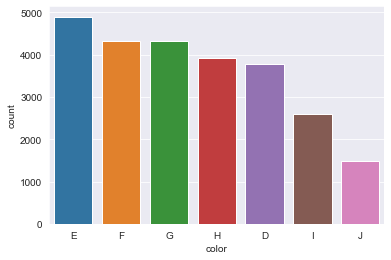

In [38]:
sns.countplot(x='color', data=diamonds,
             order=diamonds.color.value_counts().index);
# orders descending

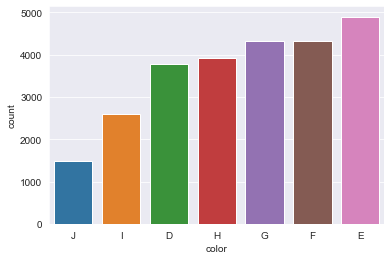

In [40]:
# To order ascending
sns.countplot(x='color', data=diamonds,
             order=diamonds.color.value_counts().index[::-1]);

### ```hue```, ```hue_order```

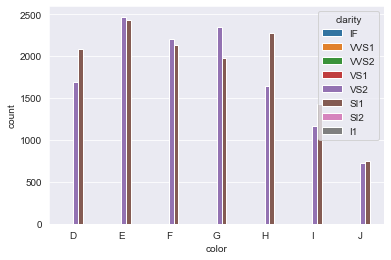

In [44]:
sns.countplot(x='color', data=diamonds, hue='clarity');
# Brings all different categories.

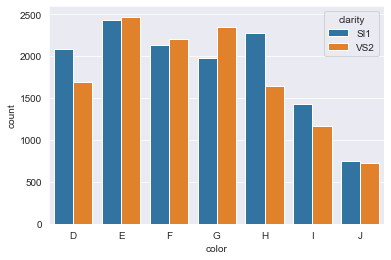

In [45]:
sns.countplot(x='color', data=diamonds,
              hue='clarity', hue_order=['SI1', 'VS2']);
# Orders by the categories that we passed in the code.

## Styling

### ```color``` and ```palette```

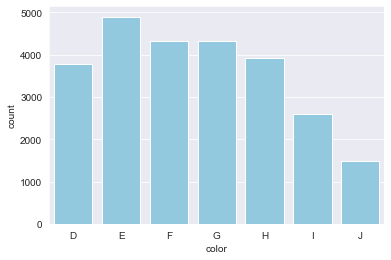

In [47]:
sns.countplot(x='color', color='skyblue', data=diamonds);

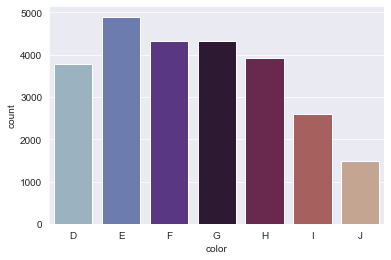

In [48]:
sns.countplot(x='color', palette='twilight', data=diamonds);

### Other Matplotlib Properties

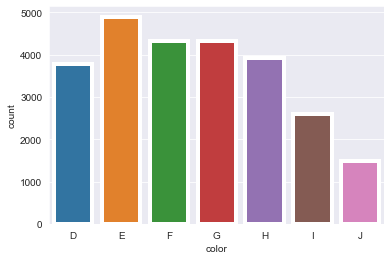

In [50]:
sns.countplot(x='color', data=diamonds,
              lw=4);

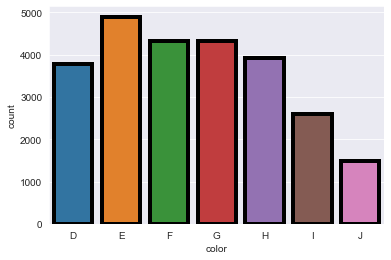

In [53]:
sns.countplot(x='color', data=diamonds,
              lw=4, ec='black');

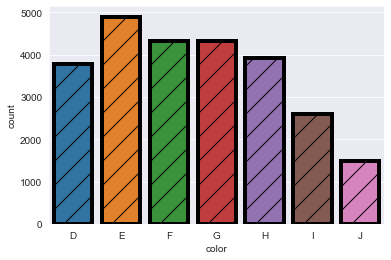

In [52]:
sns.countplot(x='color', data=diamonds,
              lw=4, ec='black', hatch='/');

## Examples, Thumbnail

In [55]:
from matplotlib import pyplot as plt

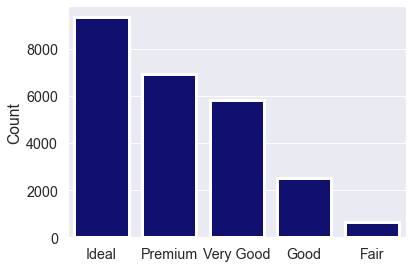

In [56]:
sns.set(style='darkgrid', font_scale=1.3)
sns.countplot(x='cut', data=diamonds, color='navy', lw=3)
plt.xlabel('')
plt.ylabel('Count')


plt.tight_layout()
#plt.savefig('20countplot_image_countplotExample.png', dpi=200);

In [57]:
sns.set_style('white')

import pandas as pd

df = pd.DataFrame({'Animal': ['dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog'],
                   'Weight': [55, 8, 12, 25, 100, 10, 60]})

In [58]:
df

,Animal,Weight
0,dog,55
1,cat,8
2,cat,12
3,dog,25
4,dog,100
5,cat,10
6,dog,60


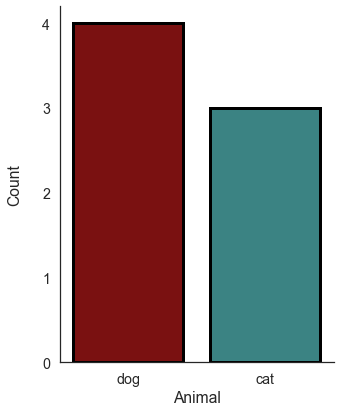

In [59]:
plt.figure(figsize=(5, 6))

sns.countplot(x='Animal', data=df, ec='black', lw=3, palette=['darkred', '#2F8F8F'])

plt.yticks([0, 1, 2, 3, 4])
plt.ylabel('Count', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats.svg');

In [60]:
df.groupby('Animal').Weight.mean()

Animal
cat    10.0
dog    60.0
Name: Weight, dtype: float64

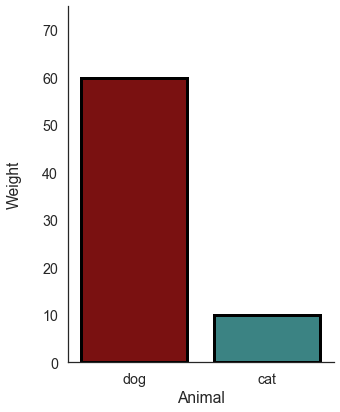

In [61]:

plt.figure(figsize=(5, 6))

sns.barplot(x='Animal', y='Weight', data=df, ec='black', lw=3, 
            palette=['darkred', '#2F8F8F'],
            ci=None
           )

plt.ylim(0, 75)
plt.ylabel('Weight', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats_bar_noCI.svg');

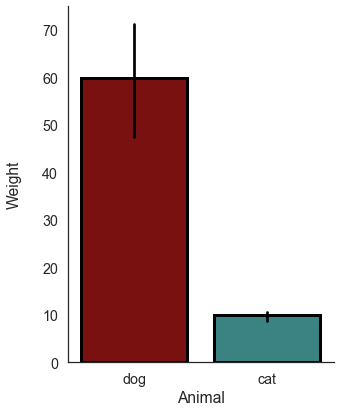

In [62]:
plt.figure(figsize=(5, 6))

sns.barplot(x='Animal', y='Weight', data=df, ec='black', lw=3, 
            palette=['darkred', '#2F8F8F'],
            ci=68, errcolor='black'
           )

plt.ylim(0, 75)
plt.ylabel('Weight', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats_bar_withCI.svg');

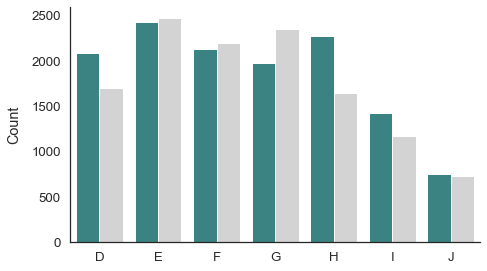

In [63]:
plt.figure(figsize=(7,4))
sns.set(style='white', font_scale=1.2)
ax = sns.countplot(x='color', data=diamonds, 
                   hue='clarity', hue_order=['SI1', 'VS2'], 
                   palette=['#2F8F8F', 'lightgray'])
ax.legend([], frameon=False)
sns.despine()

plt.xlabel('')
plt.ylabel('Count', labelpad=10)
plt.tight_layout()
#plt.savefig('21countplot_image_thumb.png', dpi=200);